In [18]:
import warnings
warnings.filterwarnings("ignore")

# **Step1: Explore the train and test datasets**

**1- Import the dataset**

In [19]:
import pandas as pd
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train_5500.csv')
test_data = pd.read_csv('test.csv')

In [20]:
train_data.head()

,Question,Category,Subcategory
0,How did serfdom develop in and then leave Russ...,DESC,manner
1,What films featured the character Popeye Doyle ?,ENTY,cremat
2,How can I find a list of celebrities ' real na...,DESC,manner
3,What fowl grabs the spotlight after the Chines...,ENTY,animal
4,What is the full form of .com ?,ABBR,exp


In [21]:
test_data.head()

,Question,Category,Subcategory
0,How far is it from Denver to Aspen ?,NUM,dist
1,"What county is Modesto , California in ?",LOC,city
2,Who was Galileo ?,HUM,desc
3,What is an atom ?,DESC,def
4,When did Hawaii become a state ?,NUM,date


**Droping the subcategory**

In [22]:
train_data=train_data.drop(['Subcategory'],axis=1)
test_data = test_data.drop(['Subcategory'], axis=1)

**Counting the target values of Category**

In [23]:
# Counting the target values of Category

train_data['Category'].value_counts()

,count
Category,
ENTY,1250
HUM,1223
DESC,1162
NUM,896
LOC,835
ABBR,86


**Distribution of the target**

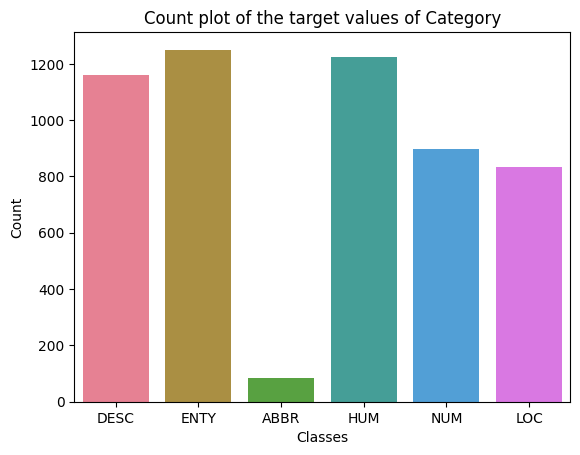

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Customize the color palette for each class
palette = sns.color_palette('husl', n_colors=train_data['Category'].nunique())

# Create the count plot
sns.countplot(x='Category', data=train_data, palette=palette)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count plot of the target values of Category')
plt.show()


**Check for missing values**

In [8]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Question    0
Category    0
dtype: int64
Question    0
Category    0
dtype: int64


**Encoding the Target Labels of the train_data and test_data**

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Category'])
y_test = label_encoder.transform(test_data['Category'])


In [25]:
x_test=test_data['Question']
x_train=train_data['Question']

# **Step2: Preprocess the Questions**

**1- Import libraries used for preprocessing the text**

In [26]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

**2- Download necessary resources**

In [27]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**4- The preprocess function**

In [28]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define custom stop words
custom_stop_words = {
    "am", "is", "are", "was", "were", "be", "being", "been","did", "the", "that", "this", "there","of", "for",
    "a", "an", "in", "on", "and", "or","can", "may","could",
    "i", "we", "you", "he", "she", "it", "our", "yours", "hers", "his"
}

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the preprocess function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove custom stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stop_words]
    return ' '.join(tokens)


**5- Preprocess the 'Question' column in train and test datasets**

In [29]:
train_data['Processed_Question'] = train_data['Question'].apply(preprocess_text)
test_data['Processed_Question'] = test_data['Question'].apply(preprocess_text)
# Tokenize the processed questions
train_data['Tokenized_Question'] = train_data['Processed_Question'].apply(nltk.word_tokenize)
test_data['Tokenized_Question'] = test_data['Processed_Question'].apply(nltk.word_tokenize)

In [15]:
train_data.head()

,Question,Category,Processed_Question,Tokenized_Question
0,How did serfdom develop in and then leave Russ...,DESC,how serfdom develop then leave russia,"[how, serfdom, develop, then, leave, russia]"
1,What films featured the character Popeye Doyle ?,ENTY,what film featured character popeye doyle,"[what, film, featured, character, popeye, doyle]"
2,How can I find a list of celebrities ' real na...,DESC,how find list celebrity real name,"[how, find, list, celebrity, real, name]"
3,What fowl grabs the spotlight after the Chines...,ENTY,what fowl grab spotlight after chinese year mo...,"[what, fowl, grab, spotlight, after, chinese, ..."
4,What is the full form of .com ?,ABBR,what full form com,"[what, full, form, com]"


In [16]:
test_data.head()

,Question,Category,Processed_Question,Tokenized_Question
0,How far is it from Denver to Aspen ?,NUM,how far from denver to aspen,"[how, far, from, denver, to, aspen]"
1,"What county is Modesto , California in ?",LOC,what county modesto california,"[what, county, modesto, california]"
2,Who was Galileo ?,HUM,who galileo,"[who, galileo]"
3,What is an atom ?,DESC,what atom,"[what, atom]"
4,When did Hawaii become a state ?,NUM,when hawaii become state,"[when, hawaii, become, state]"


# **Step3: Feature Engineering with Word2Vec and Training the LSTM Model**

**1- Text Length**

In [30]:
train_data['Question_Length'] = train_data['Question'].apply(len)
test_data['Question_Length'] = test_data['Question'].apply(len)

**2- Word Count**

In [31]:
train_data['Word_Count'] = train_data['Question'].apply(lambda x: len(x.split()))
test_data['Word_Count'] = test_data['Question'].apply(lambda x: len(x.split()))

**3- Embeddings**

**WORD2Vec**

In [ ]:
# WORD2Vec

from gensim.models import Word2Vec

# Train Word2Vec model using tokenized training questions
word2vec_model = Word2Vec(
    sentences=train_data['Tokenized_Question'], vector_size=100, window=5, min_count=1, workers=4
)

# Save the Word2Vec model (optional)
word2vec_model.save("word2vec_train_model.model")


**Generate Feature Vectors**

In [ ]:
import numpy as np

# Function to compute average Word2Vec vector for a question
def get_average_word2vec(tokens, model, vector_size):
    valid_words = [model.wv[word] for word in tokens if word in model.wv]
    if len(valid_words) == 0:
        return np.zeros(vector_size)
    return np.mean(valid_words, axis=0)

# Generate feature vectors for train and test datasets
train_data['Feature_Vector'] = train_data['Tokenized_Question'].apply(
    lambda x: get_average_word2vec(x, word2vec_model, 100)
)
test_data['Feature_Vector'] = test_data['Tokenized_Question'].apply(
    lambda x: get_average_word2vec(x, word2vec_model, 100)
)

# Prepare feature arrays and target labels
X_train = np.stack(train_data['Feature_Vector'].values)
y_train = train_data['Category']

X_test = np.stack(test_data['Feature_Vector'].values)
y_test = test_data['Category']

**4- Train and Test LSTM Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['Processed_Question'])

X_train_seq = tokenizer.texts_to_sequences(train_data['Processed_Question'])
X_test_seq = tokenizer.texts_to_sequences(test_data['Processed_Question'])

max_len = max(len(seq) for seq in X_train_seq)  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=100,  # Embedding size
                    input_length=max_len))
model.add(LSTM(128, return_sequences=False))  # LSTM layer
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train,
          validation_data=(X_test_padded, y_test),
          epochs=20,
          batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy}")

# Predictions
y_pred_proba = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class indices
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoding to class indices

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.2179 - loss: 1.6883 - val_accuracy: 0.4260 - val_loss: 1.3357
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.3999 - loss: 1.2363 - val_accuracy: 0.5260 - val_loss: 0.9710
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.6725 - loss: 0.7274 - val_accuracy: 0.5880 - val_loss: 0.7716
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.7347 - loss: 0.5353 - val_accuracy: 0.6080 - val_loss: 0.7421
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.7939 - loss: 0.4557 - val_accuracy: 0.8000 - val_loss: 0.7058
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9208 - loss: 0.2754 - val_accuracy: 0.6480 - val_loss: 0.8259
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9499 - loss: 0.2058 - val_accuracy: 0.8020 - val_loss: 0.8270
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9620 - loss: 0.1559 - 

**Plotting Accuracy**

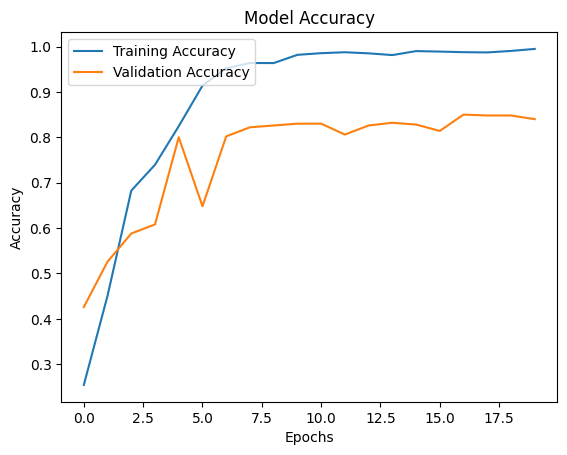

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


**Plotting Loss**

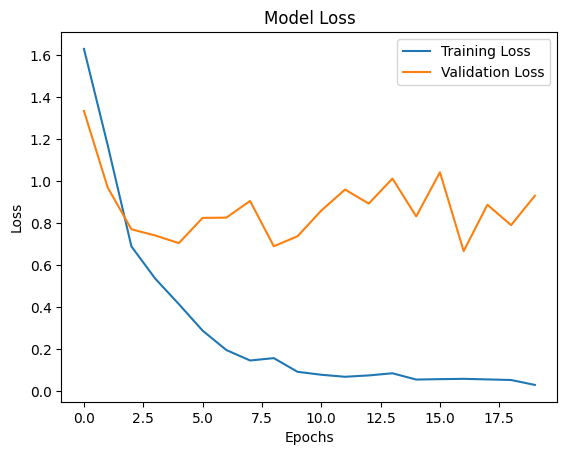

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


# **Step4: Feature engineering with BERT and training the LSTM model**

**1- Import Necessary Libraries**

In [32]:
from transformers import BertTokenizer, BertModel
import torch

**2- Load Pre-trained BERT Model**

In [33]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

**3- Function to Generate BERT Embeddings**

In [34]:
import numpy as np

# Function to compute BERT embeddings for a question
def get_bert_embeddings(text, tokenizer, model):
    # Tokenize input text and convert to tensor
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract the embeddings from the last hidden layer
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()
    return embeddings.numpy()

# Generate BERT embeddings for train and test datasets
train_data['BERT_Embedding'] = train_data['Processed_Question'].apply(
    lambda x: get_bert_embeddings(x, tokenizer, bert_model)
)
test_data['BERT_Embedding'] = test_data['Processed_Question'].apply(
    lambda x: get_bert_embeddings(x, tokenizer, bert_model)
)

# Prepare feature arrays and target labels
X_train = np.stack(train_data['BERT_Embedding'].values)
y_train = train_data['Category']

X_test = np.stack(test_data['BERT_Embedding'].values)
y_test = test_data['Category']

**4- Train and Test LSTM with BERT Embeddings**

In [49]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score


# Reshape the data to be in the form (batch_size, sequence_length, embedding_size)
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # (batch_size, 1, embedding_size)
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])  # (batch_size, 1, embedding_size)
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))  # LSTM layer
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train,
                    validation_data=(X_test_reshaped, y_test),
                    epochs=20,
                    batch_size=32)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {accuracy}")

# Predictions
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class indices
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoding to class indices

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5013 - loss: 1.2677 - val_accuracy: 0.7780 - val_loss: 0.5964
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7687 - loss: 0.6560 - val_accuracy: 0.8420 - val_loss: 0.4586
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7926 - loss: 0.5631 - val_accuracy: 0.8460 - val_loss: 0.4620
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8094 - loss: 0.5184 - val_accuracy: 0.8520 - val_loss: 0.4245
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8297 - loss: 0.4701 - val_accuracy: 0.8580 - val_loss: 0.4123
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8455 - loss: 0.4554 - val_accuracy: 0.8580 - val_loss: 0.4056
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8530 - loss: 0.4109 - val_accuracy: 0.8680 - val_loss: 0.3790
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8672 - loss: 0.3766 - val_accuracy

**Accuracy plot**

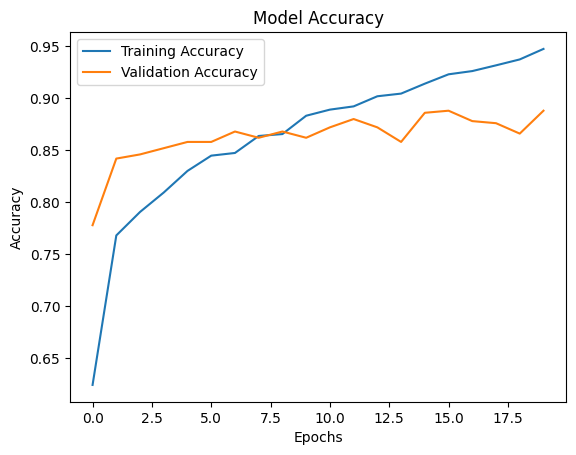

In [50]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


**Loss plot**

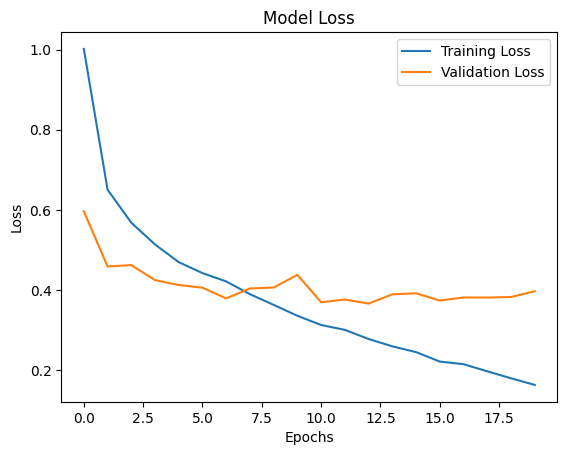

In [51]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
